# Nonlinear Optimization Exercise Session 4

Maximilian Stollmayer

### 25. Implementation of gradient method

In [23]:
from typing import Callable
import numpy as np
from numpy.typing import ArrayLike
from matplotlib import pyplot as plt

plt.style.use("seaborn-v0_8-notebook")

In [24]:
# type aliases
Scalar = float
Vector = ArrayLike
Objective = Callable[[Vector], Scalar]
Gradient = Callable[[Vector], Vector]

In [25]:
def getStepSize(
    f: Objective, x: Vector, d: Vector, snorm: Scalar, beta: Scalar, **kwargs
) -> Scalar:
    """Calculates next step size"""

    # initialization
    fx = f(x, **kwargs)
    k = 0
    t = 1

    # iterate exponent k until Armijo condition is met
    while f(x + t * d, **kwargs) > fx - t * snorm:
        k = k + 1
        t = beta**k

    return t

In [26]:
def gradientMethod(
    f: Objective,
    g: Gradient,
    x: Vector,
    eps: Scalar = 1e-4,
    sigma: Scalar = 1e-2,
    beta: Scalar = 0.5,
    **kwargs,
) -> np.ndarray:
    """
    Finds minimum of given objective function via steepest gradient descent
    Returns array of iterates
    """

    # input checking
    assert eps >= 0, f"Expected eps >= 0, got {eps}"
    assert 0 < sigma < 1, f"Expected 0 < sigma < 1, got {sigma}"
    assert 0 < beta < 1, f"Expected 0 < beta < 1, got {beta}"

    # initialization
    xs = np.array([x])
    d = -g(x, **kwargs)
    norm = np.sum(d**2)
    tol = eps**2

    # iterate x until tolerance is met
    while norm >= tol:
        t = getStepSize(f, x, d, sigma * norm, beta)
        x = x + t * d
        xs = np.append(xs, [x], axis=0)
        d = -g(x, **kwargs)
        norm = np.sum(d**2)

    return xs

#### (a) Testing on cosine

In [27]:
f = np.cos
g = lambda x: -np.sin(x)
x0 = [0.5]
eps = 1e-3
sigma = 1e-2
beta = 0.5

In [28]:
xs = gradientMethod(f, g, x0, eps, sigma, beta)

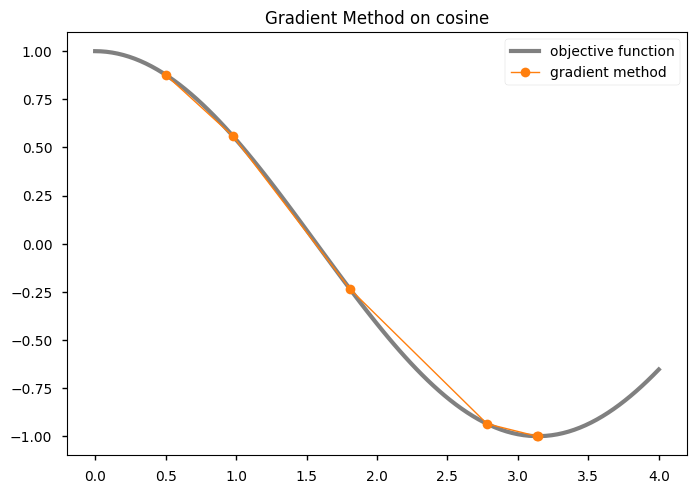

In [29]:
x = np.linspace(0, 4, 101)
plt.plot(x, f(x), color="grey", linewidth=3, label="objective function")
plt.plot(xs, f(xs), "o-", color="C1", linewidth=1, label="gradient method")
plt.title("Gradient method on cosine")
plt.legend()
plt.show()

#### (b) Testing on Himmelblau function

In [30]:
f = lambda x: (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2
g = lambda x: np.array([
        2 * (x[1] ** 2 + x[0] + 2 * x[0] * (x[0] ** 2 + x[1] - 11) - 7),
        2 * (x[0] ** 2 + x[1] + 2 * x[1] * (x[1] ** 2 + x[0] - 7) - 11),
])
x0s = [[-0.27, -0.91], [-0.271, -0.91], [-0.25, -1.1], [-0.25, -1]]
eps = 1e-1
sigma = 1e-2
beta = 0.5

In [31]:
xss = []
for x0 in x0s:
    xs = gradientMethod(f, g, x0, eps, sigma, beta)
    xss.append(xs)

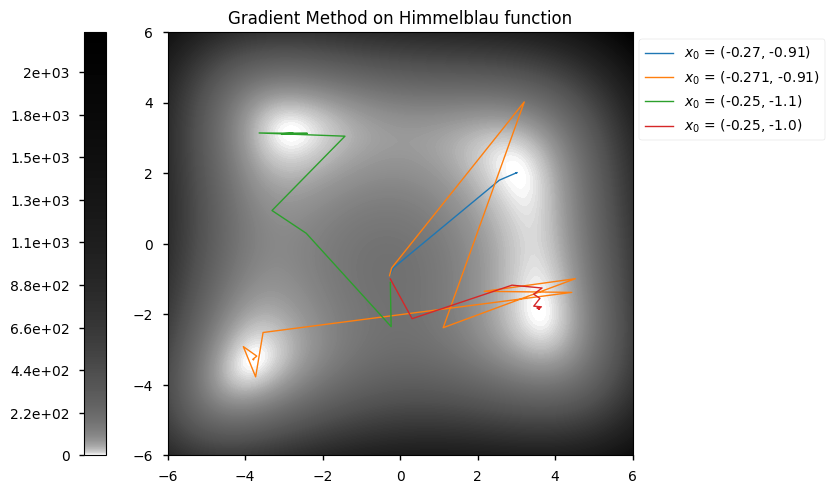

In [32]:
x = np.linspace(-6, 6, 101)
X, Y = np.meshgrid(x, x)
plt.contourf(X, Y, f([X, Y]), levels=1000, cmap="Greys", norm="log")

for xs in xss:
    plt.plot(xs.T[0], xs.T[1], "-", label=fr"$x_0$ = {tuple(xs[0])}", linewidth=1)

plt.title("Gradient method on Himmelblau function")
plt.legend(bbox_to_anchor=(1,1))
plt.colorbar(location="left", format="{x:.2g}")
plt.show()

#### (c) Testing on a quadratic function

In [33]:
f = lambda x: 6*x[0]**2 - 6*x[0]*x[1] + 2*x[1]**2 + x[0] + x[1] + 1
g = lambda x: np.array([
    12*x[0] - 6*x[1] + 1,
    4*x[1] - 6*x[0] + 1
])

x0 = [1, 2]
eps = 1e-2
sigma = 1e-2
beta = 0.5

In [34]:
xs = gradientMethod(f, g, x0, eps, sigma, beta)

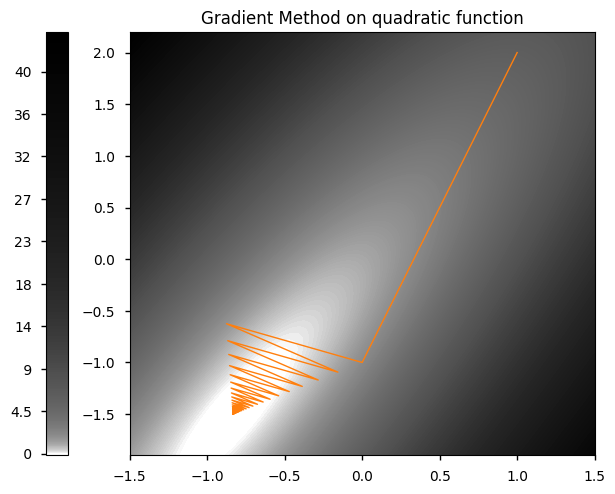

In [35]:
x = np.linspace(-1.5, 1.5, 101)
y = np.linspace(-1.9, 2.2, 101)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, f([X, Y]), levels=1000, cmap="Greys", norm="log")
plt.plot(xs.T[0], xs.T[1], color="C1", linewidth=1)
plt.colorbar(location="left", format="{x:2.2g}")
plt.title("Gradient method on quadratic function")
plt.show()

### 26. Gradient method on Rosenbrock function

In [81]:
f = lambda x: (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
g = lambda x: np.array([
    -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2),
    200*(x[1] - x[0]**2)
])

x0 = [-1.2, 1]
epsilons = 10.0**np.arange(-5, 0)
sigma = 1e-4
beta = 0.5

minimum = [1, 1]

In [82]:
xss = []
iterations = []
errors = []
for eps in epsilons:
    xs = gradientMethod(f, g, x0, eps, sigma, beta)
    xss.append(xs)
    iterations.append(len(xs))
    errors.append(np.linalg.norm(xs[-1] - minimum))

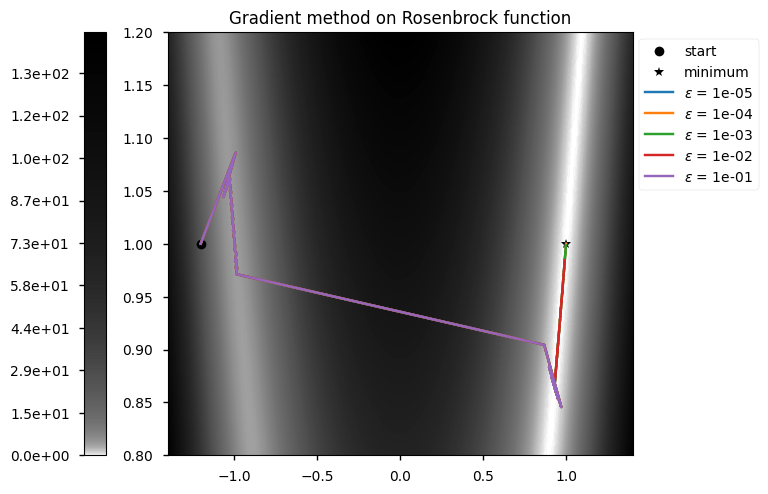

In [86]:
x = np.linspace(-1.4, 1.4, 101)
y = np.linspace(0.8, 1.2, 101)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, f([X, Y]), levels=1000, cmap="Greys", norm="log")
plt.plot(*x0, "ko", label="start")
plt.plot(*minimum, "k*", label="minimum")

for eps, xs in zip(epsilons, xss):
    plt.plot(xs.T[0], xs.T[1], "-", label=fr"$\varepsilon$ = {eps:.0e}")

plt.title("Gradient method on Rosenbrock function")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.colorbar(location="left", format="{x:.1e}")
plt.show()

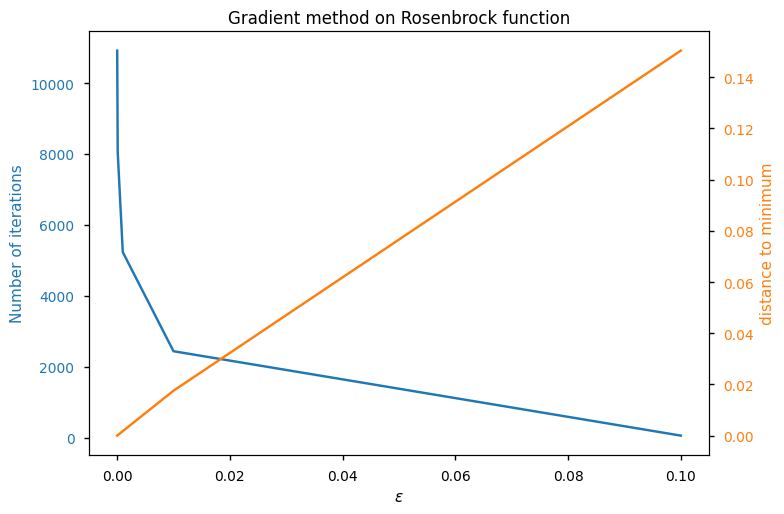

In [84]:
fig, ax1 = plt.subplots()
 
ax1.set_xlabel(r"$\varepsilon$")
ax1.set_ylabel("Number of iterations", color="C0")
ax1.plot(epsilons, iterations, color="C0")
ax1.tick_params(axis="y", labelcolor="C0")

ax2 = ax1.twinx()
ax2.set_ylabel("distance to minimum", color="C1")
ax2.plot(epsilons, errors, color="C1")
ax2.tick_params(axis ="y", labelcolor="C1")

plt.title("Gradient method on Rosenbrock function")
plt.show()